# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [2]:
# https://github.com/kelchoo/UCBE-MLAI-PracticalAssignment-17.1/blob/main/prompt_III.ipynb
# https://github.com/elifsenaozefe/deciding_loans/blob/main/prompt_III.ipynb
# https://github.com/Arasu/Bank-Marketing-Data-Set/blob/main/prompt_III.ipynb
# https://github.com/Leopard-2019/Comparing-Classifiers/blob/main/notebook/PracticalApplicationAssignment_17.1-Copy1.ipynb


##### The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import time

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import HuberRegressor, LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#create a logistic regression model and fit it to the churn data and classify the data based on "churn" column
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.utils import resample


from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn import set_config
set_config(display="diagram")
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import roc_auc_score,precision_recall_curve, roc_curve,confusion_matrix,accuracy_score, recall_score, precision_score,plot_confusion_matrix, ConfusionMatrixDisplay

import datetime

import warnings
warnings.filterwarnings('ignore')



In [4]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [5]:
pd.set_option('display.max_columns', None)

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [6]:
df.isnull().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
len(df)

41188

In [8]:
# total number of unknowns in each column
print("total number of unknowns in each column :")
for col in df.columns:
    if 'unknown' in df[col].unique():
        print(col, df[col].value_counts()['unknown'], " - ", round(df[col].value_counts()['unknown']/len(df), 4)*100, "%")
        


total number of unknowns in each column :
job 330  -  0.8 %
marital 80  -  0.19 %
education 1731  -  4.2 %
default 8597  -  20.87 %
housing 990  -  2.4 %
loan 990  -  2.4 %


#### 3.1 conclution : 
1. Total there are 41188 rows and 21 columns
2. There is no null values in any column, which means the quality of the data is good.
3. percentage of unknown values in any column is very low in all columns except default column, which is 20%.

In [9]:
# count number of column types
df.dtypes.value_counts()

object     11
int64       5
float64     5
dtype: int64

In [10]:
# print each column type and number of unique values in tabluar form

for col in df.columns:
    print(f'{col}: {df[col].dtype}, {df[col].nunique()}')




age: int64, 78
job: object, 12
marital: object, 4
education: object, 8
default: object, 3
housing: object, 3
loan: object, 3
contact: object, 2
month: object, 10
day_of_week: object, 5
duration: int64, 1544
campaign: int64, 42
pdays: int64, 27
previous: int64, 8
poutcome: object, 3
emp.var.rate: float64, 10
cons.price.idx: float64, 26
cons.conf.idx: float64, 26
euribor3m: float64, 316
nr.employed: float64, 11
y: object, 2


In [11]:
df.select_dtypes(exclude = 'number').nunique()
# there are 10 categorical columns and 1 numerical column'


job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

#### 3.2:
1. Numrical columns : 10, object columns : 10 (1 of them is the target column)
2. All object columns are categorical columns having unique values less than 12
3. The target column is binary, which means it is a classification problem.

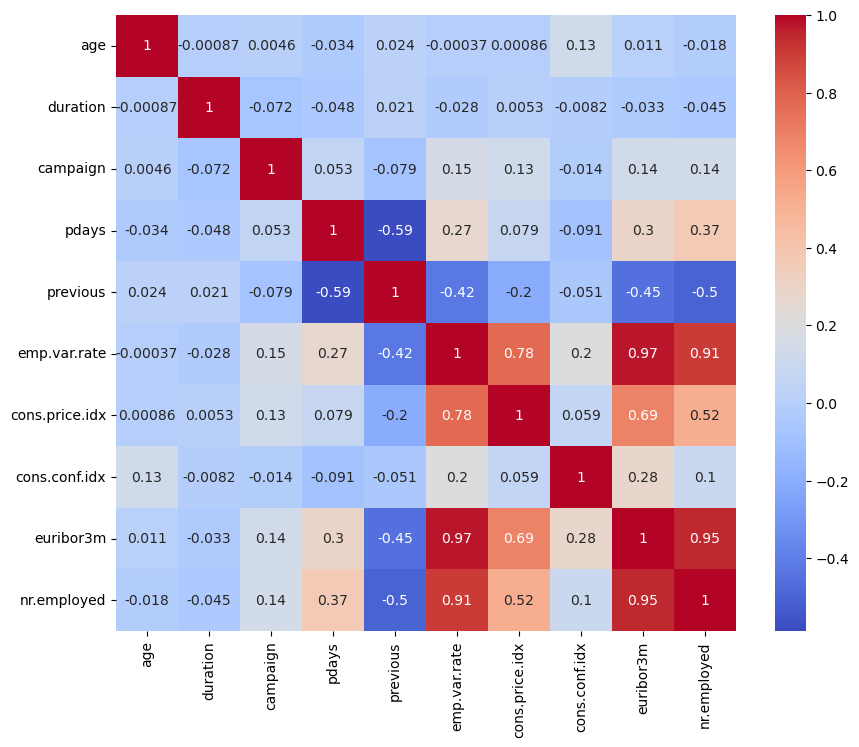

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [13]:
# create a y boolean column for churn
# Drop df2 from memory



df2 = df
df2['y_bool'] = df2['y'].map({'yes': 1, 'no': 0})

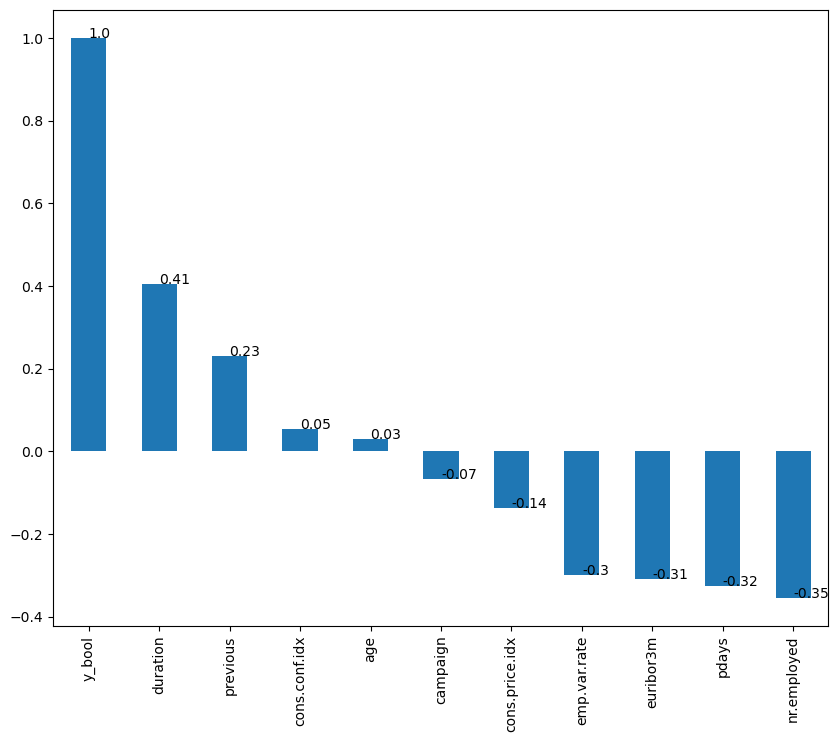

In [14]:
# plot the correlation values in descending order impacted by the target variable
plt.figure(figsize=(10, 8))
df2.corr()['y_bool'].sort_values(ascending=False).plot(kind='bar')
# show the value on the bar
for i in range(len(df2.corr()['y_bool'].sort_values(ascending=False))):
    plt.text(i, df2.corr()['y_bool'].sort_values(ascending=False)[i], round(df2.corr()['y_bool'].sort_values(ascending=False)[i], 2))
    
plt.show()


#### 3.3:
1. duration, previous, emp.var.rate, euribor3m, pdays, nr.employed are the columns having more than 0.23 imapct on the target column.
2. higher the duration and previous, higher the chances of subscribing to the term deposit.
3. higher the emp.var.rate, euribor3m, pdays, nr.employed, lower the chances of subscribing to the term deposit.

In [15]:
# categorical columns
cat_cols = df2.select_dtypes(exclude = 'number').columns


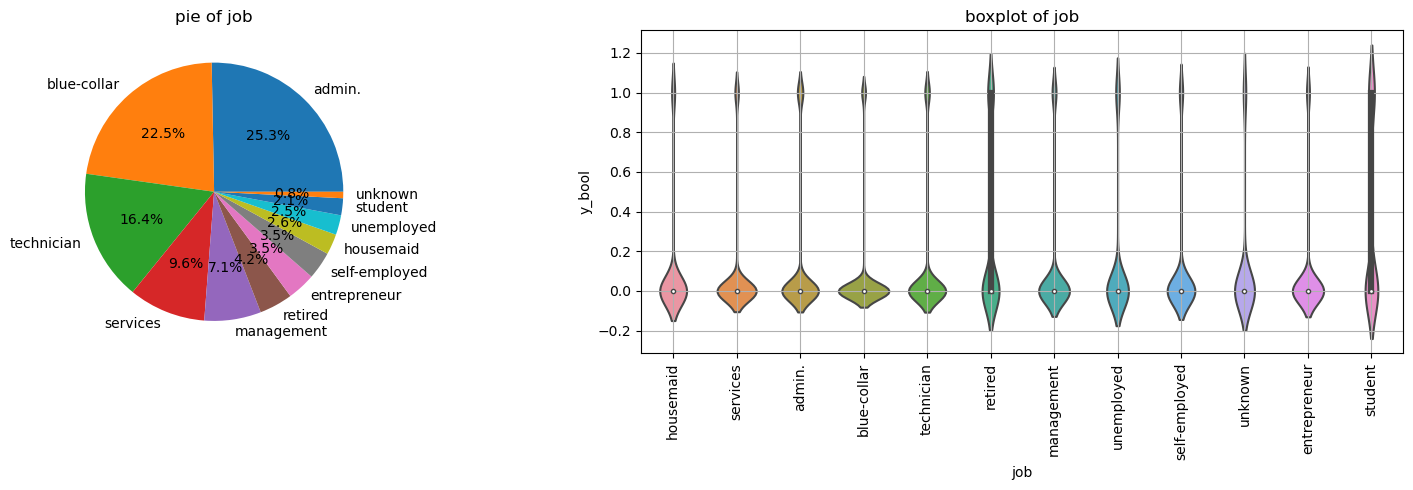

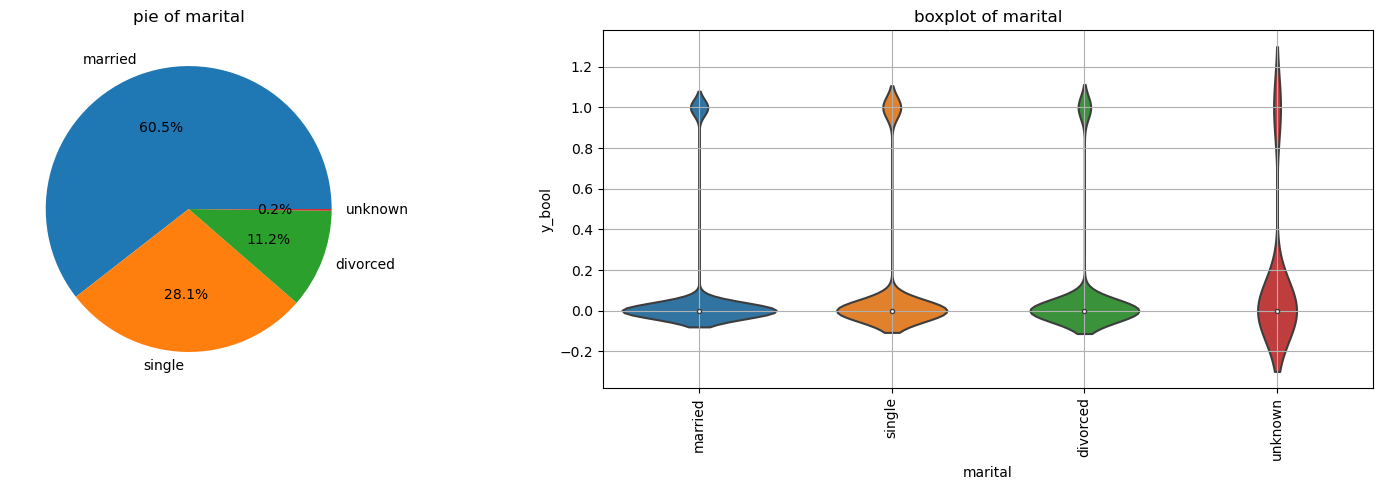

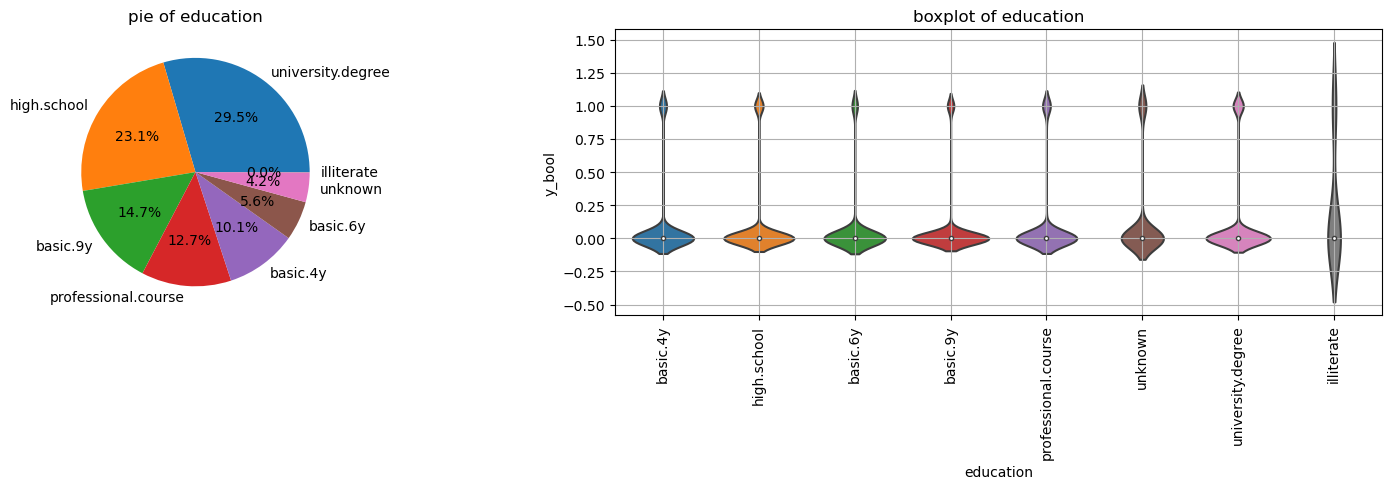

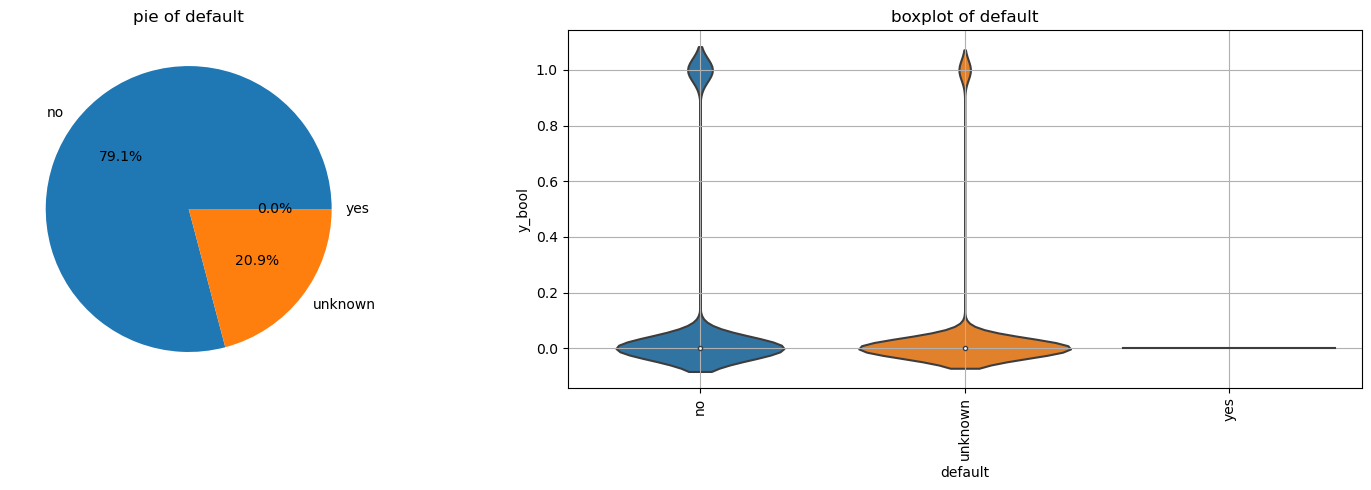

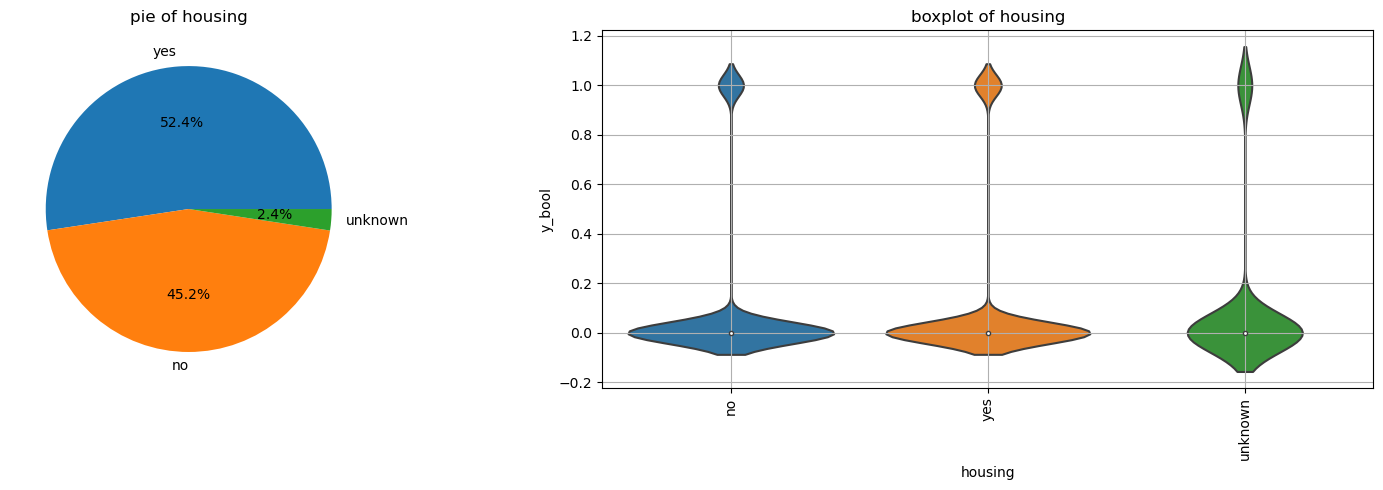

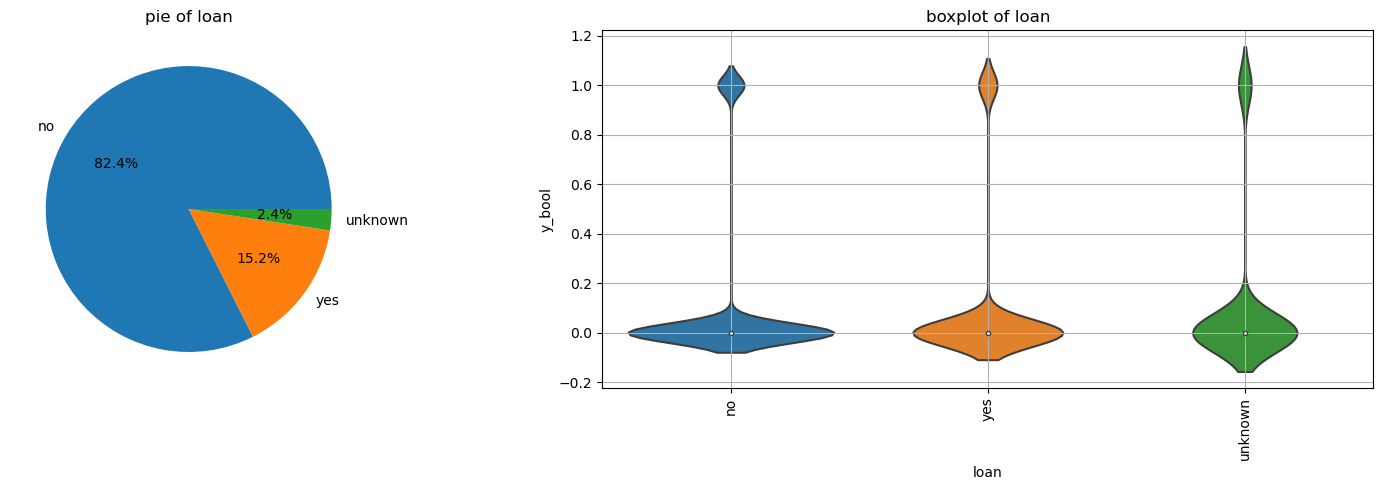

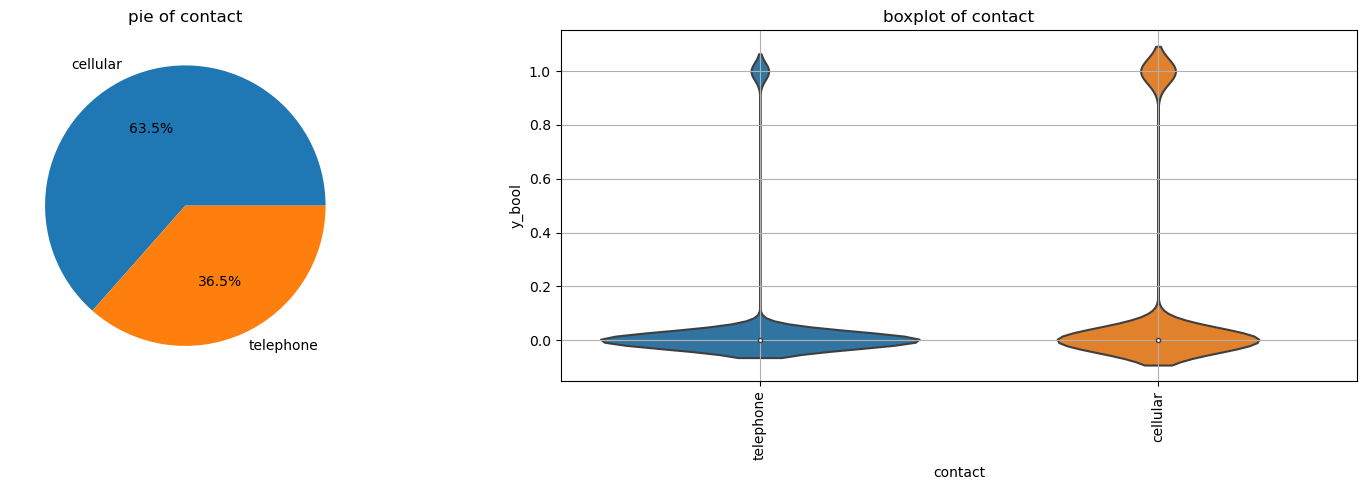

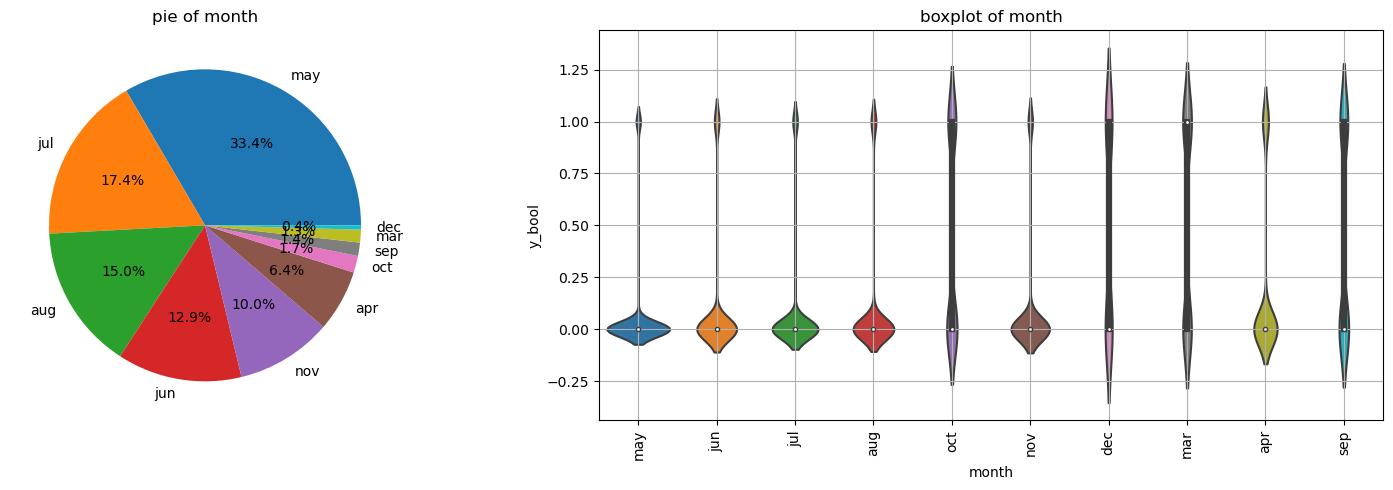

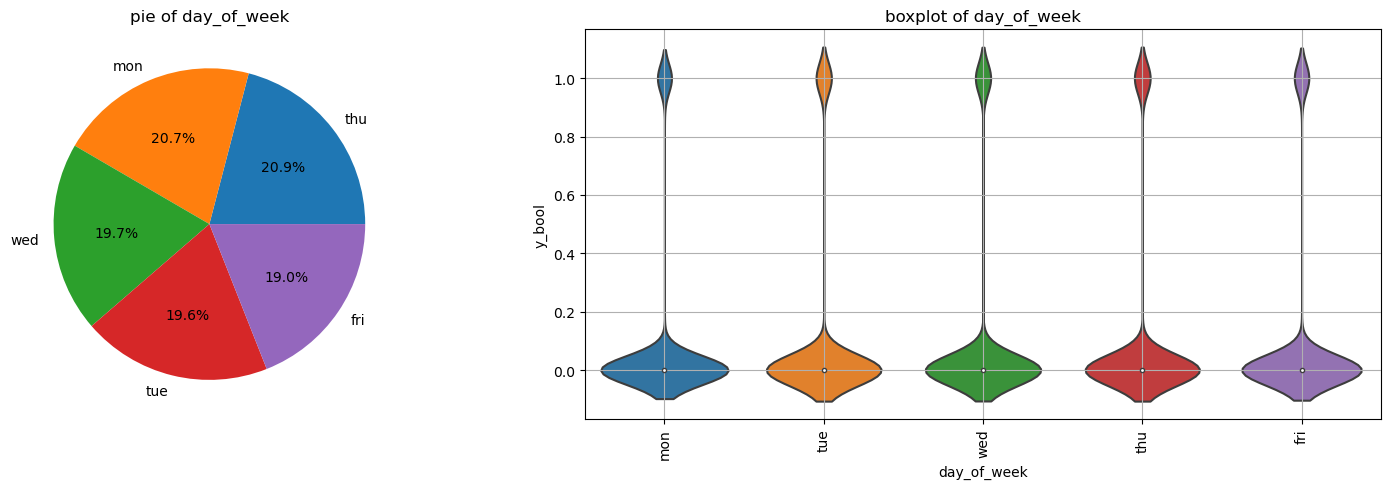

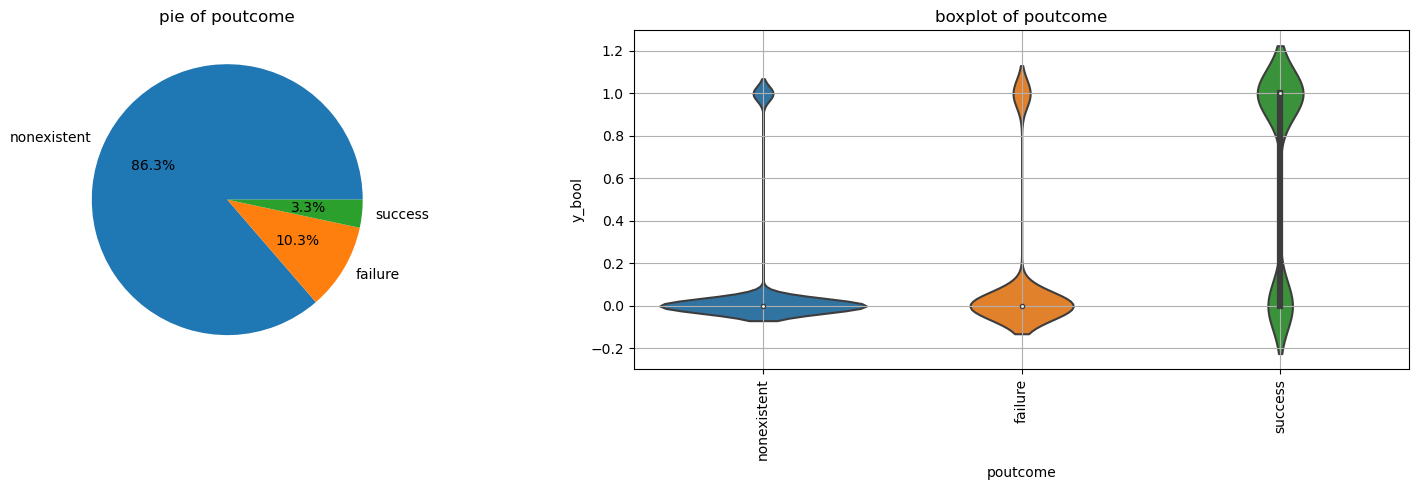

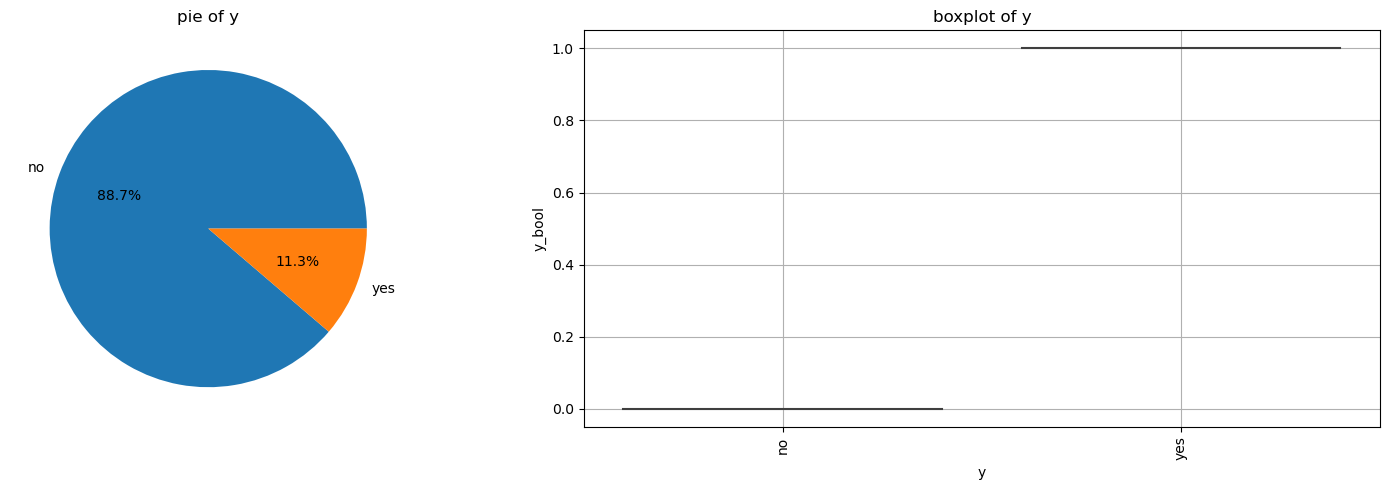

In [16]:
## show box plots wrt to price for each categorical column which had less than 10 unique values
for variable in cat_cols:
    fig, ax = plt.subplots(1, 2, figsize = (16, 5))

    # sns.countplot(x=variable, data=df2, ax=ax[1])
    # pie chart
    df2[variable].value_counts().plot(kind='pie', ax=ax[0], autopct='%1.1f%%')
    # plt.xticks(rotation=90)
    # plt.tight_layout()
    # ax[0].grid()
    title = f'pie of {variable}'
    # hide the y label
    ax[0].set_ylabel('')

    ax[0].set_title(title)
    
    #show how y_bool is distributed wrt to each categorical column using violin plot
    sns.violinplot(x=variable, y='y_bool', data=df2, ax=ax[1])
    plt.xticks(rotation=90)
    plt.tight_layout()
    ax[1].grid()
    title = f'boxplot of {variable}'
    ax[1].set_title(title)


# some points to note:
1. The data is imbalanced, which means the target column has more no values (only 11%) than yes values.
2. The data is not normalized, which means the data is not in the same scale.
3. admin is the most common job, followed by blue-collar and technician.
4. married people are more than single and divorced people.
5. most of the people have university degree.
6. most of the people have no credit in default.
7. most of the people have no housing loan.
8. most of the people have no personal loan.
9. most of the people are contacted through cellular.
10. most of the people are contacted in the month of may.
11. most of the people are contacted on the last day of the week.
12. most of the people are contacted for the first time.
13. there are more clinets who were not subscribed to the term deposit in the previous campaign.

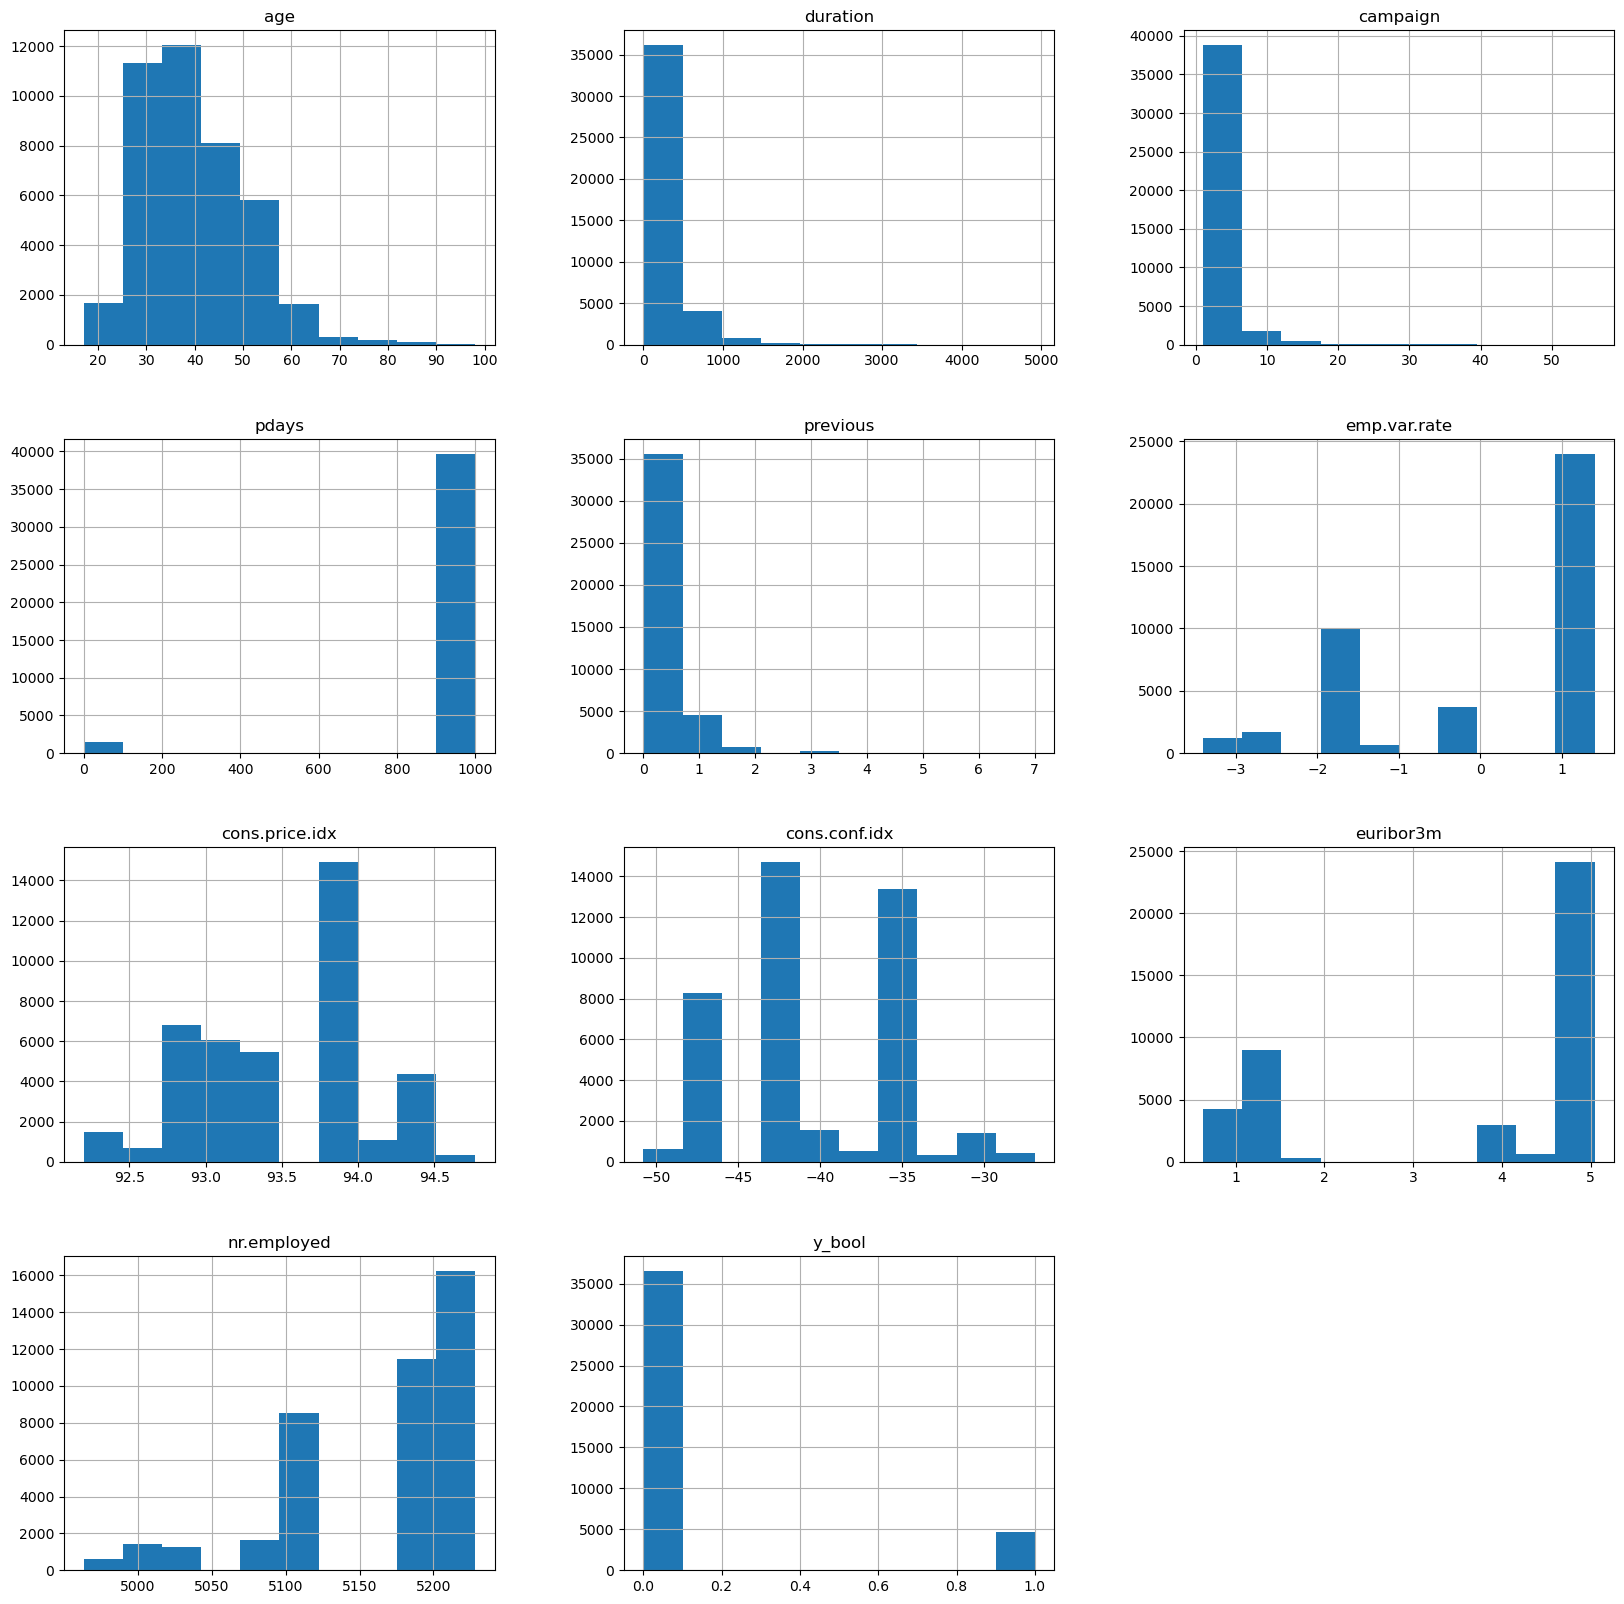

In [17]:
# show histograms for all columns
df2.hist(figsize=(20, 20))
plt.show()

In [18]:
# plt.figure(figsize=(28,40))
# b = 0 
# for i in df2.columns:
#     b+=1
#     plt.subplot(6,6,b)
#     plt.hist(df2[i])
#     plt.title(i)
# plt.grid(True)
# plt.show()


In [19]:
# print all the columns which are not normally distributed
for col in df2.select_dtypes(include = 'number').columns:
    p_value = stats.shapiro(df2[col])[1]
    if p_value < 0.05:
        print(f'{col}: {p_value}')


age: 0.0
duration: 0.0
campaign: 0.0
pdays: 0.0
previous: 0.0
emp.var.rate: 0.0
cons.price.idx: 0.0
cons.conf.idx: 0.0
euribor3m: 0.0
nr.employed: 0.0
y_bool: 0.0


#### above are the numerical columns, which are not normalized.

In [20]:
# #normalize distribution of numerical columns using z-score
# for col in df2.select_dtypes(include = 'number').columns:
#     df2[col] = (df2[col] - df2[col].mean())/df2[col].std()
# # print all the columns which are not normally distributed
# for col in df2.select_dtypes(include = 'number').columns:
#     p_value = stats.shapiro(df2[col])[1]
#     if p_value < 0.05:
#         print(f'{col}: {p_value}')


In [21]:
# # histogram of normalized numerical columns
# df2.hist(figsize=(20, 20))
# plt.show()


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<AxesSubplot:>

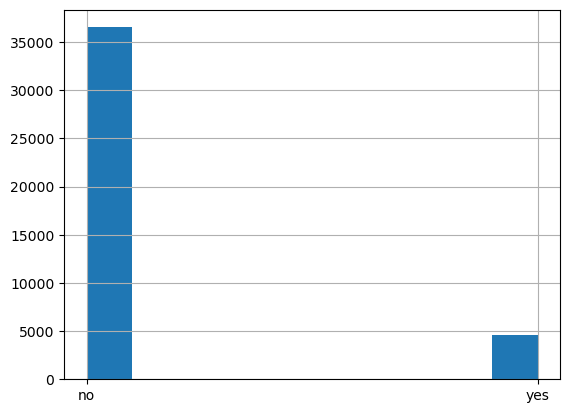

In [23]:
# histogram of y_bool column
df['y'].hist()

#### looking at this plot, we can see that the target column is imbalanced, which means the model will be biased towards the majority class.

Target column Y is `has the client subscribed a term deposit`. This represents a binary classification problem. The objective is to predict whether the client will subscribe to the term deposit or not.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [24]:
not_churn = df2[df2.y=='yes']
churn = df2[df2.y=='no']

churn_upsampled = resample(churn,
                            replace=True, # sample with replacement
                            n_samples=len(not_churn), # match number in majority class
                            random_state=27) # reproducible results
df2 = pd.concat([not_churn, churn_upsampled])

df2.y.value_counts()

yes    4640
no     4640
Name: y, dtype: int64

In [25]:
df2.drop('y_bool', axis=1, inplace=True)

In [26]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ss = StandardScaler()
ohe_cols = df2.select_dtypes(exclude = 'number').columns.drop('y')
ss_cols = df2.select_dtypes(include = 'number').columns
ohe_cols, ss_cols

(Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'day_of_week', 'poutcome'],
       dtype='object'),
 Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
        'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
       dtype='object'))

In [27]:
preprocessor = make_column_transformer((ohe, ohe_cols), (ss, ss_cols))

In [28]:
df2.value_counts('y')

y  
no     4640
yes    4640
dtype: int64

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [29]:
X = df2.drop('y', axis=1)
y = df2['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [30]:
dummy_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy="most_frequent"))])
dummy_model = dummy_pipe.fit(X_train, y_train)
y_pred = dummy_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.00      0.00      0.00       942
         yes       0.49      1.00      0.66       914

    accuracy                           0.49      1856
   macro avg       0.25      0.50      0.33      1856
weighted avg       0.24      0.49      0.32      1856



##### baseline accuracy is 89%. Any better model should have accuracy more than 89%.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [31]:
lr_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state = 42))])
lr_model = lr_pipe.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.89      0.84      0.86       942
         yes       0.85      0.89      0.87       914

    accuracy                           0.87      1856
   macro avg       0.87      0.87      0.87      1856
weighted avg       0.87      0.87      0.87      1856



##### As we can see above that the accuracy of LogisticRegression base model is 91%, which is better than the baseline accuracy.

### Problem 9: Score the Model

What is the accuracy of your model?

In [32]:
dict = {'model': [],
        'train_acc': [],
        'test_acc': [],
        'time': [],
        'split': [],
        'grid': [],
        'data': [],
        'precision' : [],
        'recall' : [],
        'f1-score' : [],
        'support' : [],
        'timestamp' : []}
out_df = pd.DataFrame(dict)


In [33]:

def calcOutRow(model, name, X_train, X_test, y_train, y_test, split, dataCSVName, timeTaken, gridSearch):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df.columns = ['precision', 'recall', 'f1-score', 'support']
    rowIndexName = 'True'
    if 'True' in report_df.index:
        report_df.loc['True']
        rowIndexName = 'True'
    else:
        report_df.drop(['accuracy', 'macro avg', 'weighted avg'], inplace=True)
        report_df.loc['mean'] = report_df.mean()
        rowIndexName = 'mean'
    eachRow = {'model':name,
        'train_acc': model.score(X_train, y_train),
        'test_acc': model.score(X_test, y_test),
        'time': np.round(timeTaken, 4),
        'split': split,
        'grid': gridSearch,
        'data': dataCSVName,
        'precision' : report_df.loc[rowIndexName]['precision'],
        'recall' : report_df.loc[rowIndexName]['recall'],
        'f1-score' : report_df.loc[rowIndexName]['f1-score'],
        'support' : report_df.loc[rowIndexName]['support']
        }
    out_df.loc[len(out_df)] = eachRow

In [34]:
def plotConfusionMatrics(name, model, grid_model, X_test, y_test, X_test_grid, y_test_grid):
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    fig.suptitle('Confusion Matrix')
    plot_confusion_matrix(model, X_test, y_test, ax=ax[0], display_labels=['no', 'yes'])
    ax[0].set_title("Base Model:"+name)
    plot_confusion_matrix(grid_model, X_test_grid, y_test_grid, ax=ax[1], display_labels=['no', 'yes'], cmap='Blues')
    ax[1].set_title('With GridSearchCV :'+name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [35]:

def calcAcc_score(data_df, columnsToDrop, target, model_pipe, name, grid_param, split, dataCSVName):
    X = data_df.drop(columnsToDrop, axis=1)
    y = data_df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)
    start = time.time()
    model = model_pipe.fit(X_train, y_train)
    end = time.time()
    print(f'basic fit {name} timetaken: {end-start}')
    print(f'{name}', f'      split :{split} Train ACC: {model.score(X_train, y_train)}')
    print(f'{name}', f'      split :{split} Test ACC: {model.score(X_test, y_test)}')
    calcOutRow(model, name, X_train, X_test, y_train, y_test, split, dataCSVName, end-start, 'No')
    feats = {} # a dict to hold feature_name: feature_importance
    if (name == 'DecisionTreeClassifier' ):
        start = time.time()
        for feature, importance in zip(X_train.columns, model['classifier'].feature_importances_):
            feats[feature] = importance #add the name/value pair 
        # print(feats)
        end = time.time()
        importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
        # importances.sort_values(by='Gini-importance')
        # print(importances.sort_values(by='Gini-importance' , ascending=False))
        importances.sort_values(by='Gini-importance' , ascending=False).plot(kind='bar', rot=45)
        plt.title("Feature Importance:"+name+" timetaken:"+str(end-start))
        plt.show()
        # select top 10 features into list
        top10important = importances.sort_values(by='Gini-importance', ascending=False).head(10).index.tolist()
    elif (name == 'LogisticRegression' or name == 'KNeighborsClassifier' or name == 'SVC'):
        # calculate permutation importance
        # print('start permutation importance'+time.ctime())
        start = time.time()
        perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
        end = time.time()
        # select top 10 features into list
        top10important = X_test.columns[np.argsort(perm_importance.importances_mean)[-10:]].tolist()
        # plot permutation importance for top 10 features
        sorted_idx = perm_importance.importances_mean.argsort()
        plt.boxplot(perm_importance.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
        plt.title("Permutation Importances:"+name +" timetaken:"+str(end-start))
        plt.show()
    else:
        top10important = X.columns.tolist()

        

    # consider only top 10 features for grid search

    ohe_cols_grid = []
    ss_cols_grid = []
    for col in top10important:
        if X[col].dtype == 'object':
            ohe_cols_grid.append(col)
        else:
            ss_cols_grid.append(col)

    preprocessor = make_column_transformer((ohe, ohe_cols_grid), (ss, ss_cols_grid))
    grid_pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        model_pipe.steps[1:][0]])

    X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(X[top10important], y, test_size=0.2, random_state=42)
    # grid_pipe = Pipeline(model_pipe.steps[1:])
    start = time.time()
    # grid_pipe = Pipeline(clf.steps[1:3])
    grid = GridSearchCV(grid_pipe, grid_param)
    grid.fit(X_train_grid, y_train_grid)
    end = time.time()
    print(f'{name}-grid', f' split :{split} Train ACC: {grid.best_estimator_.score(X_train_grid, y_train_grid)}, grid-fit timetaken: {end-start}')
    print(f'{name}-grid', f' split :{split} Test ACC: {grid.best_estimator_.score(X_test_grid, y_test_grid)}')
    calcOutRow(grid.best_estimator_, name, X_train_grid, X_test_grid, y_train_grid, y_test_grid, split, dataCSVName, end-start, 'Yes')
    print(f'{name}-grid', f' split :{split} best params', grid.best_params_)
    y_pred_grid = grid.best_estimator_.predict(X_test_grid)
    print(classification_report(y_test_grid, y_pred_grid))
    plotConfusionMatrics(name, model, grid.best_estimator_, X_test, y_test, X_test_grid, y_test_grid)

    
    


In [36]:
# # sample testing
# i = 0.2
# dataCSVName = 'test'
# columnsToDrop = ['y']
# target = 'y'

# svc_pipe = Pipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('classifier', SVC(random_state=42, kernel='rbf'))])


# svc_params = {
#         'classifier__C': [0.01],
#         'classifier__gamma': [0.01],
#         'classifier__kernel': ['rbf']
#         }
# calcAcc_score(df2, columnsToDrop, target, svc_pipe, 'SVC', svc_params, i, dataCSVName)

# dt_pipe = Pipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('classifier', DecisionTreeClassifier(random_state=42, max_depth=10))])

# dt_params = {'classifier__max_depth': [2]}
# # print(X_train.columns)
# calcAcc_score(df2, columnsToDrop, target, dt_pipe, 'DecisionTreeClassifier', dt_params,i, dataCSVName)



# lr_pipe = Pipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('classifier', LogisticRegression(random_state=42))])

# lr_params = {
#         'classifier__penalty': ['l1'],
#         'classifier__solver': ['liblinear', 'saga'],
#         'classifier__max_iter': [1]
# }
# calcAcc_score(df2, columnsToDrop, target, lr_pipe, 'LogisticRegression', lr_params, i, dataCSVName)


# knn_pipe = Pipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('classifier', KNeighborsClassifier(n_neighbors=3000))])

# knn_params = {
#         'classifier__n_neighbors': [3000],
# }
# calcAcc_score(df2, columnsToDrop, target, knn_pipe, 'KNeighborsClassifier', knn_params, i, dataCSVName)



In [37]:
def validateClassifiers( preprocessor, data_df, columnsToDrop, target, dataCSVName):
    X = data_df.drop(columnsToDrop, axis=1)
    y = data_df[target]
    # for i in [0.1, 0.2, 0.3, 0.4]:
    for i in [0.2]:
        # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=random_state)
        #1. DecisionTreeClassifier
        dt_pipe = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', DecisionTreeClassifier(random_state=42))])

        dt_params = {'classifier__min_impurity_decrease': np.logspace(-3, 3, 7),
                'classifier__max_depth': np.arange(2, 11, 2),
                'classifier__min_samples_split': np.logspace(-2, 2, 5)}
        calcAcc_score(df2, columnsToDrop, target, dt_pipe, 'DecisionTreeClassifier', dt_params, i, dataCSVName)

        #2. LogisticRegression
        lr_pipe = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', LogisticRegression(random_state=42))])

        lr_params = {
            'classifier__penalty': ['l1', 'l2'],
            'classifier__C': np.logspace(-1, 1, 3),
            'classifier__solver': ['liblinear', 'saga'],
            'classifier__max_iter': [100]
        }
        calcAcc_score(df2, columnsToDrop, target, lr_pipe, 'LogisticRegression', lr_params, i, dataCSVName)

        #3. KNeighborsClassifier
        knn_pipe = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', KNeighborsClassifier())])

        knn_params = {
            'classifier__n_neighbors': np.linspace(100, 3000, 10, dtype=int),
            'classifier__weights': ['uniform', 'distance'],
            'classifier__metric': ['euclidean', 'manhattan']
        }
        calcAcc_score(df2, columnsToDrop, target, knn_pipe, 'KNeighborsClassifier', knn_params, i, dataCSVName)

        #4. SVC
        svc_pipe = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', SVC(random_state=42))])


        svc_params = {
            # 'classifier__C': np.logspace(-1, 1, 3),
            # 'classifier__kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
            # 'classifier__gamma': np.logspace(-2, 1, 4)
                'classifier__gamma': [0.01],
                'classifier__kernel': ['rbf']
            }
        calcAcc_score(df2, columnsToDrop, target, svc_pipe, 'SVC', svc_params, i, dataCSVName)



In [38]:
# create array exponential of 10 from 1 to 100
# np.linspace(100, 3000, 10)
# integer linspace
# np.linspace(100, 3000, 10, dtype=int) => array([ 100,  422,  744, 1066, 1388, 1711, 2033, 2355, 2677, 3000])
# np.logspace(-1, 1, 3) => array([ 0.1,  1. , 10. ])

# np.logspace(-2, 1, 4)

In [39]:
# # for testing
# model = dt_pipe.fit(X_train, y_train)
# print(model['classifier'].feature_importances_)
# print(f'{name}', f'      split :{split} Train ACC: {model.score(X_train, y_train)}, timetaken: {end-start}')
# print(f'{name}', f'      split :{split} Test ACC: {model.score(X_test, y_test)}')
# feature_imp_df = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_})
# feature_imp_df.sort_values(by = 'importance', ascending = False)


        #4. SVC
# svc_pipe = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', SVC(random_state=42))])


# svc_params = {
#     # 'classifier__kernel': ['rbf'],
#     # 'classifier__gamma': [0.01]
#     'classifier__C': [0.1, 1, 10],
#     'classifier__gamma': [1, 0.1, 0.01],
#     'classifier__kernel': ['rbf']
#     }
# calcAcc_score(X_train, X_test, y_train, y_test, svc_pipe, 'SVC', svc_params, 0.2, 'test3')


fit timetaken: 0.09945178031921387
DecisionTreeClassifier       split :0.2 Train ACC: 1.0
DecisionTreeClassifier       split :0.2 Test ACC: 0.8491379310344828


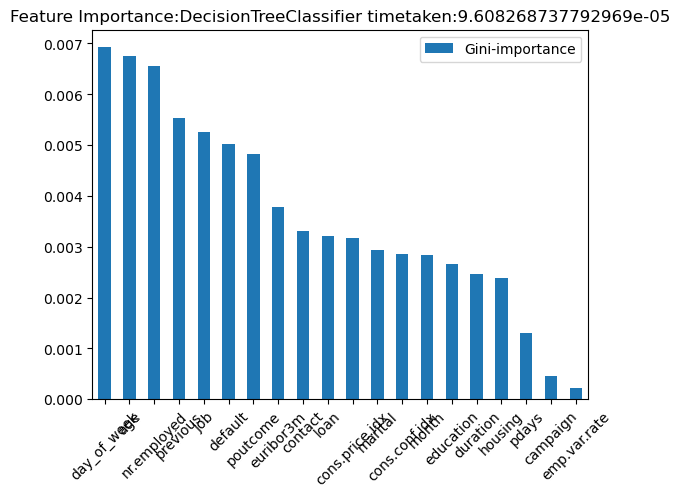

DecisionTreeClassifier-grid  split :0.2 Train ACC: 0.7432650862068966, timetaken: 29.10634207725525
DecisionTreeClassifier-grid  split :0.2 Test ACC: 0.7429956896551724
DecisionTreeClassifier-grid  split :0.2 best params {'classifier__max_depth': 6, 'classifier__min_impurity_decrease': 0.001, 'classifier__min_samples_split': 0.01}
              precision    recall  f1-score   support

          no       0.70      0.87      0.78       942
         yes       0.82      0.61      0.70       914

    accuracy                           0.74      1856
   macro avg       0.76      0.74      0.74      1856
weighted avg       0.76      0.74      0.74      1856



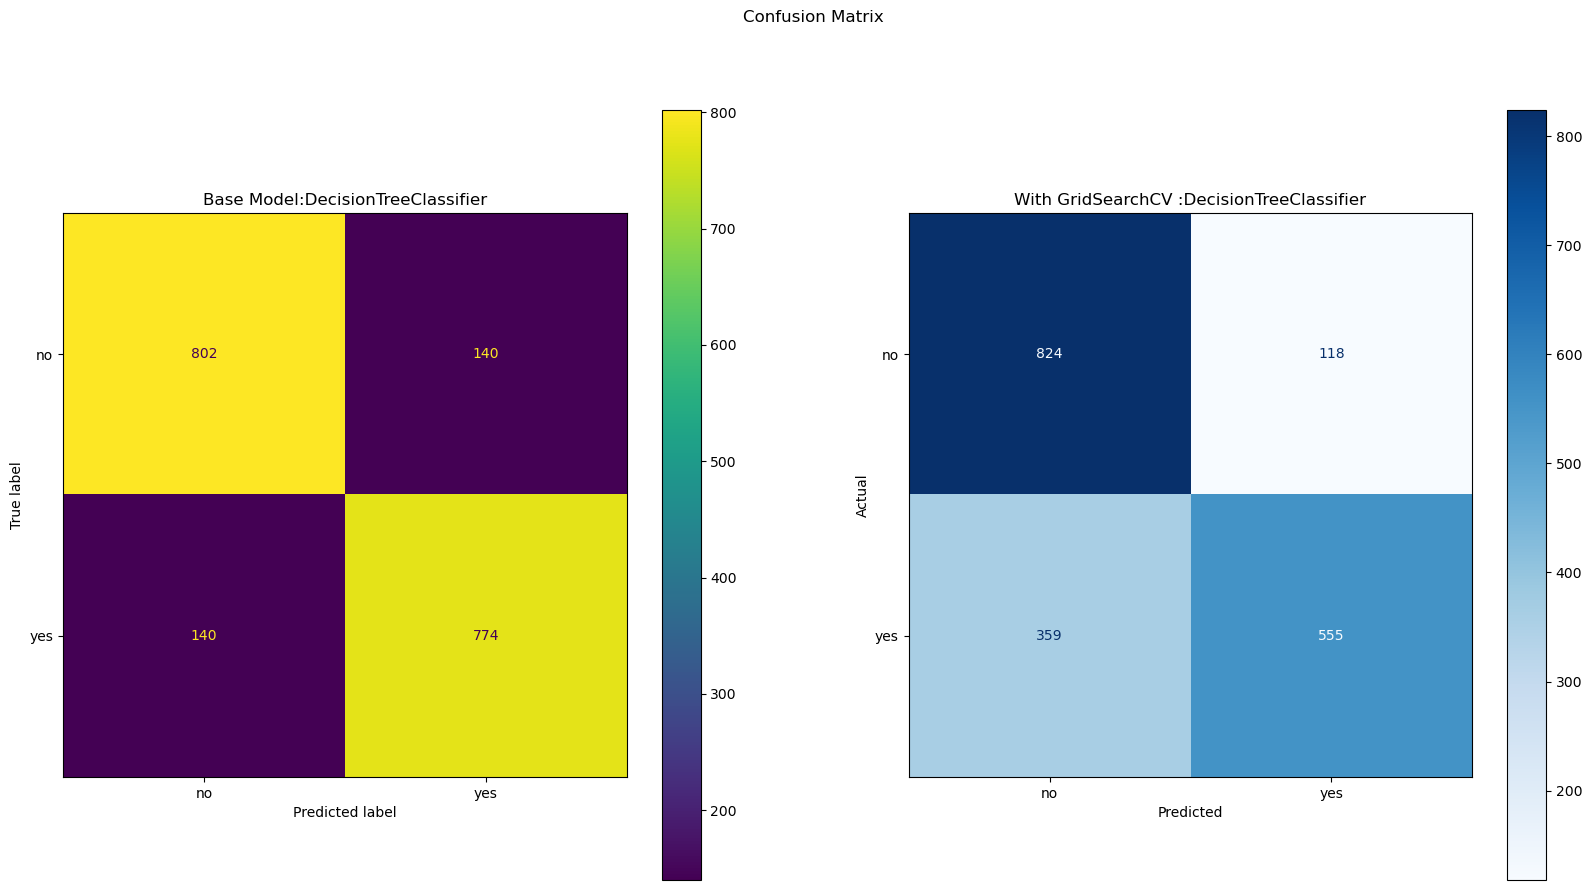

fit timetaken: 0.1221151351928711
LogisticRegression       split :0.2 Train ACC: 0.8701508620689655
LogisticRegression       split :0.2 Test ACC: 0.8658405172413793


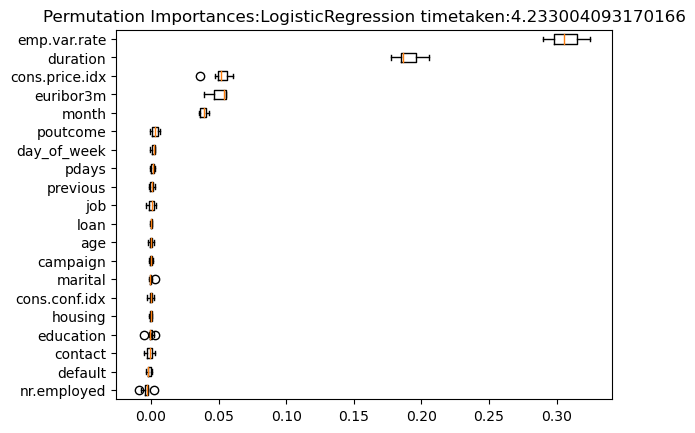

LogisticRegression-grid  split :0.2 Train ACC: 0.8677262931034483, timetaken: 9.84323000907898
LogisticRegression-grid  split :0.2 Test ACC: 0.8609913793103449
LogisticRegression-grid  split :0.2 best params {'classifier__C': 0.1, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
              precision    recall  f1-score   support

          no       0.88      0.84      0.86       942
         yes       0.84      0.88      0.86       914

    accuracy                           0.86      1856
   macro avg       0.86      0.86      0.86      1856
weighted avg       0.86      0.86      0.86      1856



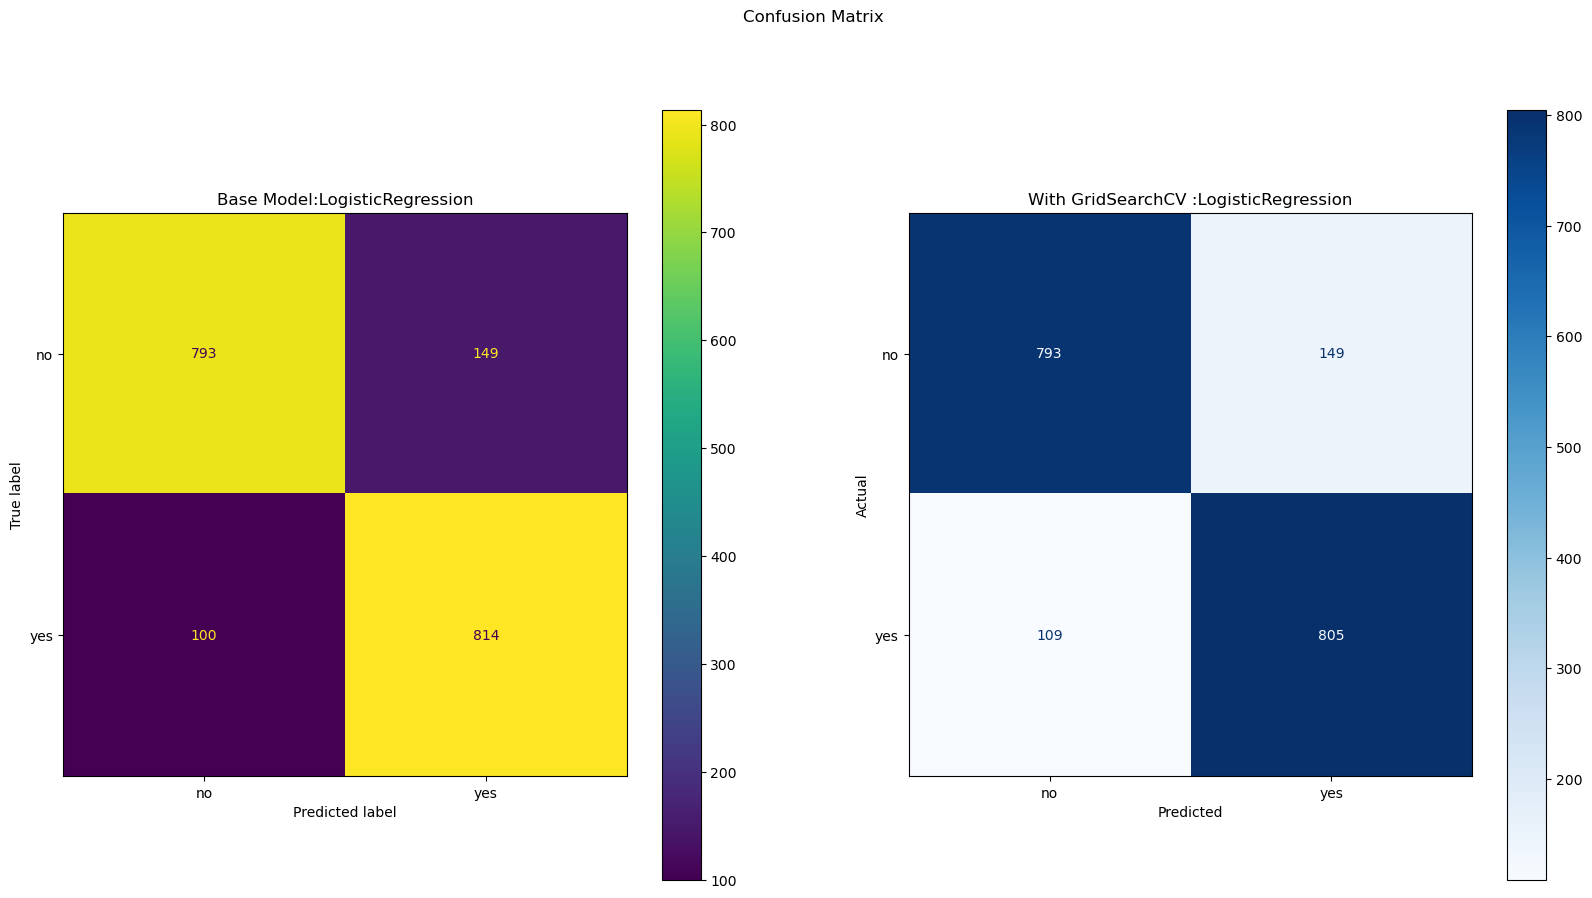

fit timetaken: 0.040242910385131836
KNeighborsClassifier       split :0.2 Train ACC: 0.8868534482758621
KNeighborsClassifier       split :0.2 Test ACC: 0.8356681034482759


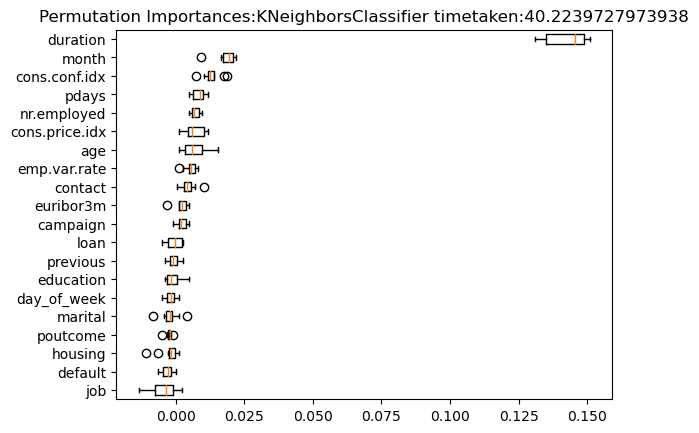

KNeighborsClassifier-grid  split :0.2 Train ACC: 0.9998653017241379, timetaken: 104.9036591053009
KNeighborsClassifier-grid  split :0.2 Test ACC: 0.8744612068965517
KNeighborsClassifier-grid  split :0.2 best params {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 100, 'classifier__weights': 'distance'}
              precision    recall  f1-score   support

          no       0.91      0.84      0.87       942
         yes       0.85      0.91      0.88       914

    accuracy                           0.87      1856
   macro avg       0.88      0.87      0.87      1856
weighted avg       0.88      0.87      0.87      1856



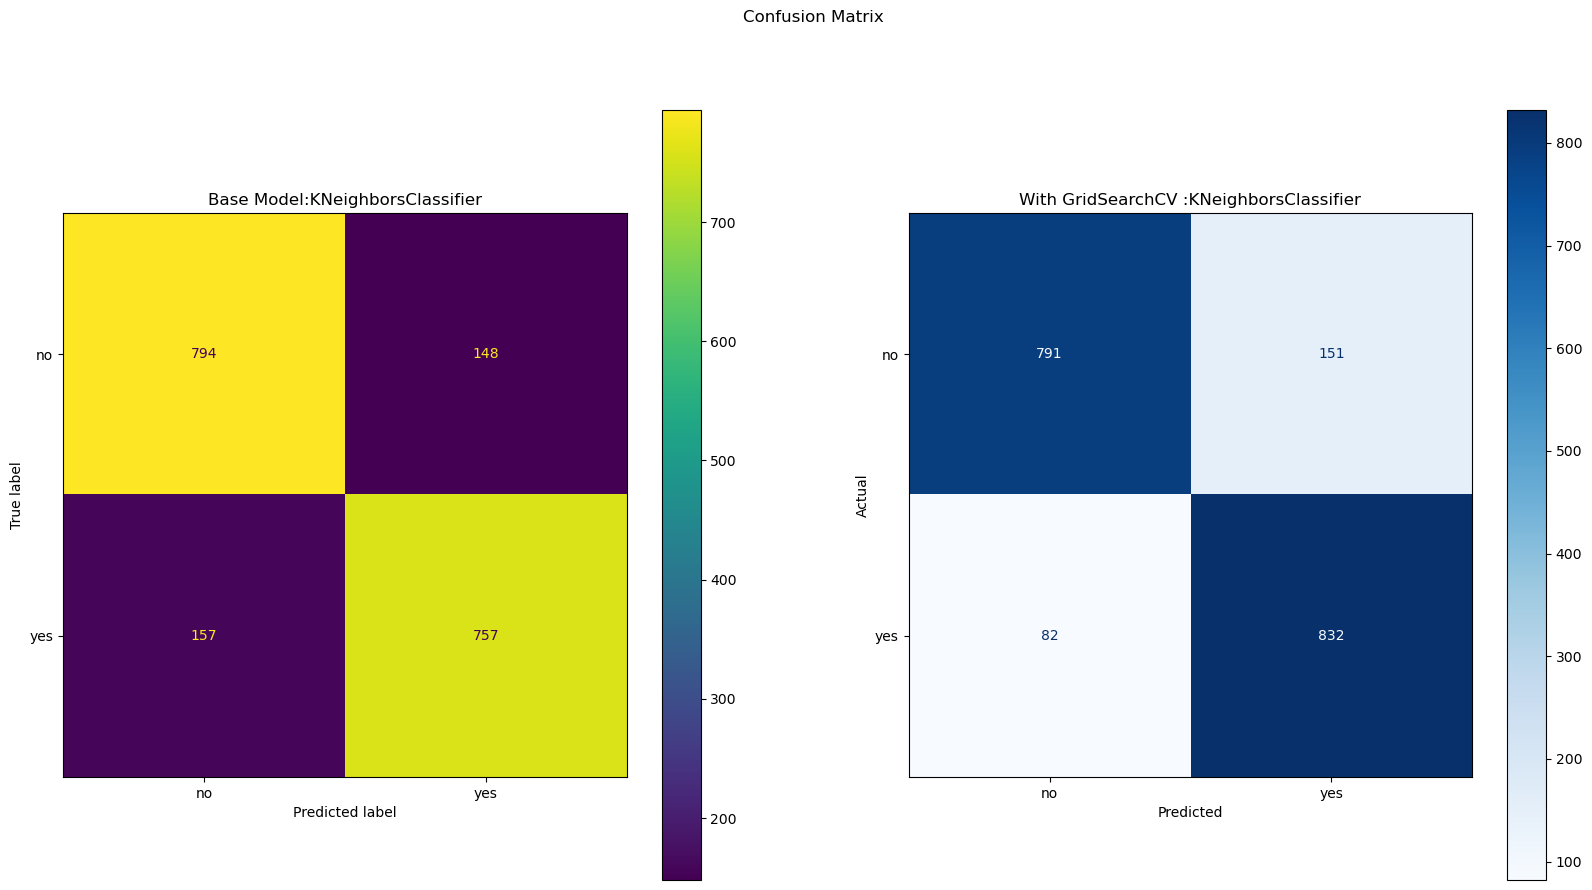

fit timetaken: 1.9808471202850342
SVC       split :0.2 Train ACC: 0.8948006465517241
SVC       split :0.2 Test ACC: 0.8787715517241379


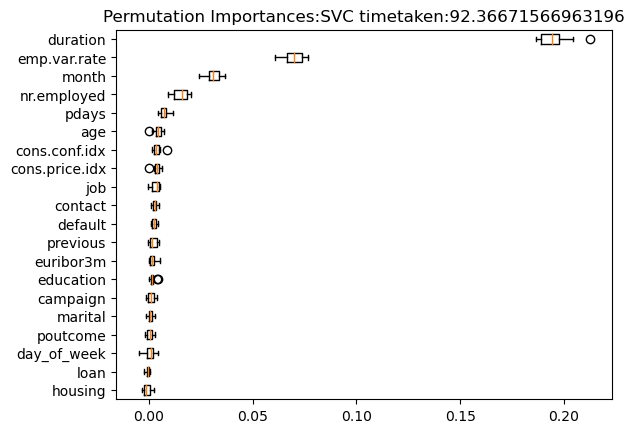

SVC-grid  split :0.2 Train ACC: 0.8713631465517241, timetaken: 8.503323078155518
SVC-grid  split :0.2 Test ACC: 0.8658405172413793
SVC-grid  split :0.2 best params {'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}
              precision    recall  f1-score   support

          no       0.90      0.82      0.86       942
         yes       0.83      0.91      0.87       914

    accuracy                           0.87      1856
   macro avg       0.87      0.87      0.87      1856
weighted avg       0.87      0.87      0.87      1856



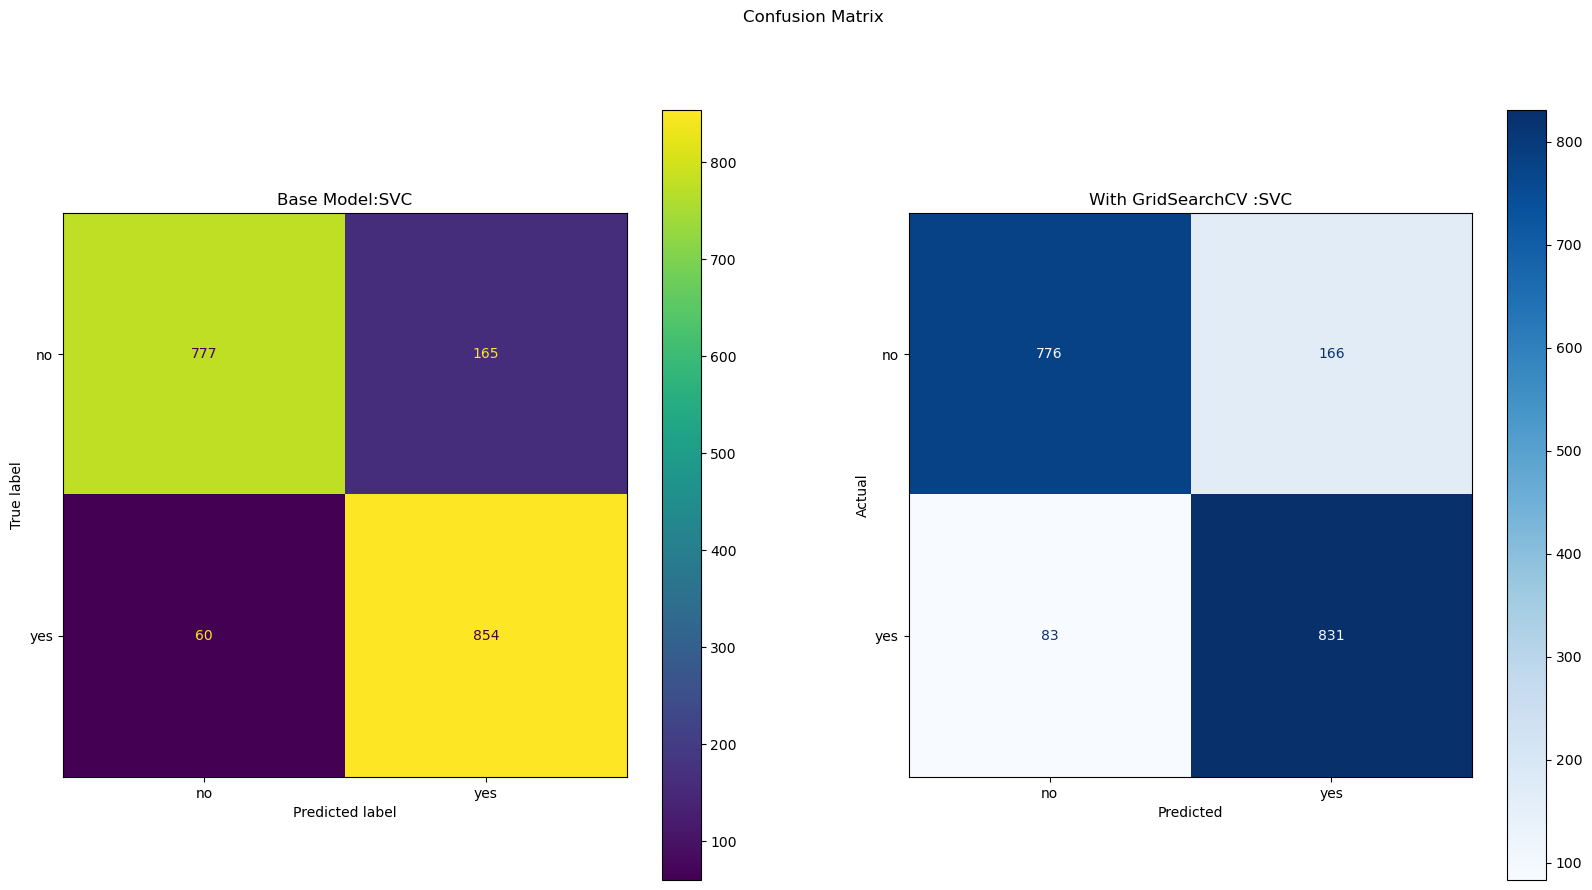

In [40]:
validateClassifiers(preprocessor, df2, ['y'], 'y', 'bank')

In [41]:
def plotAccuracies(orig_df, split, grid, dataCSVName):
    # subplot graph showing train and test accuracy for each classifier where grid search was used
    # and where it was not used
    out_df = orig_df[orig_df['data'] == dataCSVName]
    if(out_df.empty):
        print(f'No data found for this dataset "{dataCSVName}" and split size {split}')
        return
    sns.set_style("whitegrid")
    sns.set(rc={'figure.figsize':(20, 10)})
    sns.set(font_scale=1.5)
    sns.set_style("ticks")
    sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
    sns.set_style({"xtick.bottom": True, "ytick.left": True})

    # select rows where grid search was used and where it was not used for split size 0.2
    plot_data = out_df[out_df['grid'] == grid][out_df['split']==split].sort_values(by='time', ascending=False)

    fig, ax = plt.subplots(1, 1, sharey=True)
    # increase space between subplots
    fig.subplots_adjust(wspace=0.1)
    # plot train and test accuracy in same plot
    plot_data.plot.bar(x='model', y=['train_acc', 'test_acc', 'precision', 'recall', 'f1-score'], ax=ax)
    # show value of test and train accuracy on bar plot for each column and put it on top of bar
    for i, v in enumerate(plot_data['train_acc']):
        ax.text(i-.25, v+.01, str(np.round(v, 2)), color='blue', fontweight='bold') # first index is horizontal, second is vertical
    for i, v in enumerate(plot_data['test_acc']):
        ax.text(i+.01, v+.01, str(np.round(v, 2)), color='orange', fontweight='bold')


    # use twinx to plot time on same plot
    ax2 = ax.twinx()
    plot_data.plot.line(x='model', y='time', ax=ax2, color='black', marker='o')
    plot_data.plot.scatter(x='model', y='time', ax=ax2, color='black', marker='o')
    # show value of time on scatter plot
    for i, v in enumerate(plot_data['time']):
        ax2.text(i, v, str(np.round(v, 2)), color='black', fontweight='bold')

    #ax2 set ylabel false to avoid duplicate labels
    ax2.set_ylabel('')


    # set plot titles and labels # set title higher to avoid overlapping with legend
    if grid == 'Yes':
        ax.set_title(f'Grid Search Used - Split Size {split}', y=1.05)
    else:
        ax.set_title(f'Base classifier - Split Size {split}', y=1.05)

    ax.set_xlabel('Classifiers')
    ax.set_ylabel('Test and Train Accuracy')
    ax.set_ylim(0, 1)
    plt.setp(ax.get_xticklabels(), rotation=75)
    # move legend to top right
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    # move ax2 legend below ax legend
    ax2.legend(loc='upper left', bbox_to_anchor=(1, 0.7))

    plt.suptitle(f'Train and Test Accuracy for dataset:{dataCSVName}, split:{split}', fontsize=20)
    # plt.savefig(f'images/{dataCSVName}.png', format="png", bbox_inches='tight')
    plt.show()


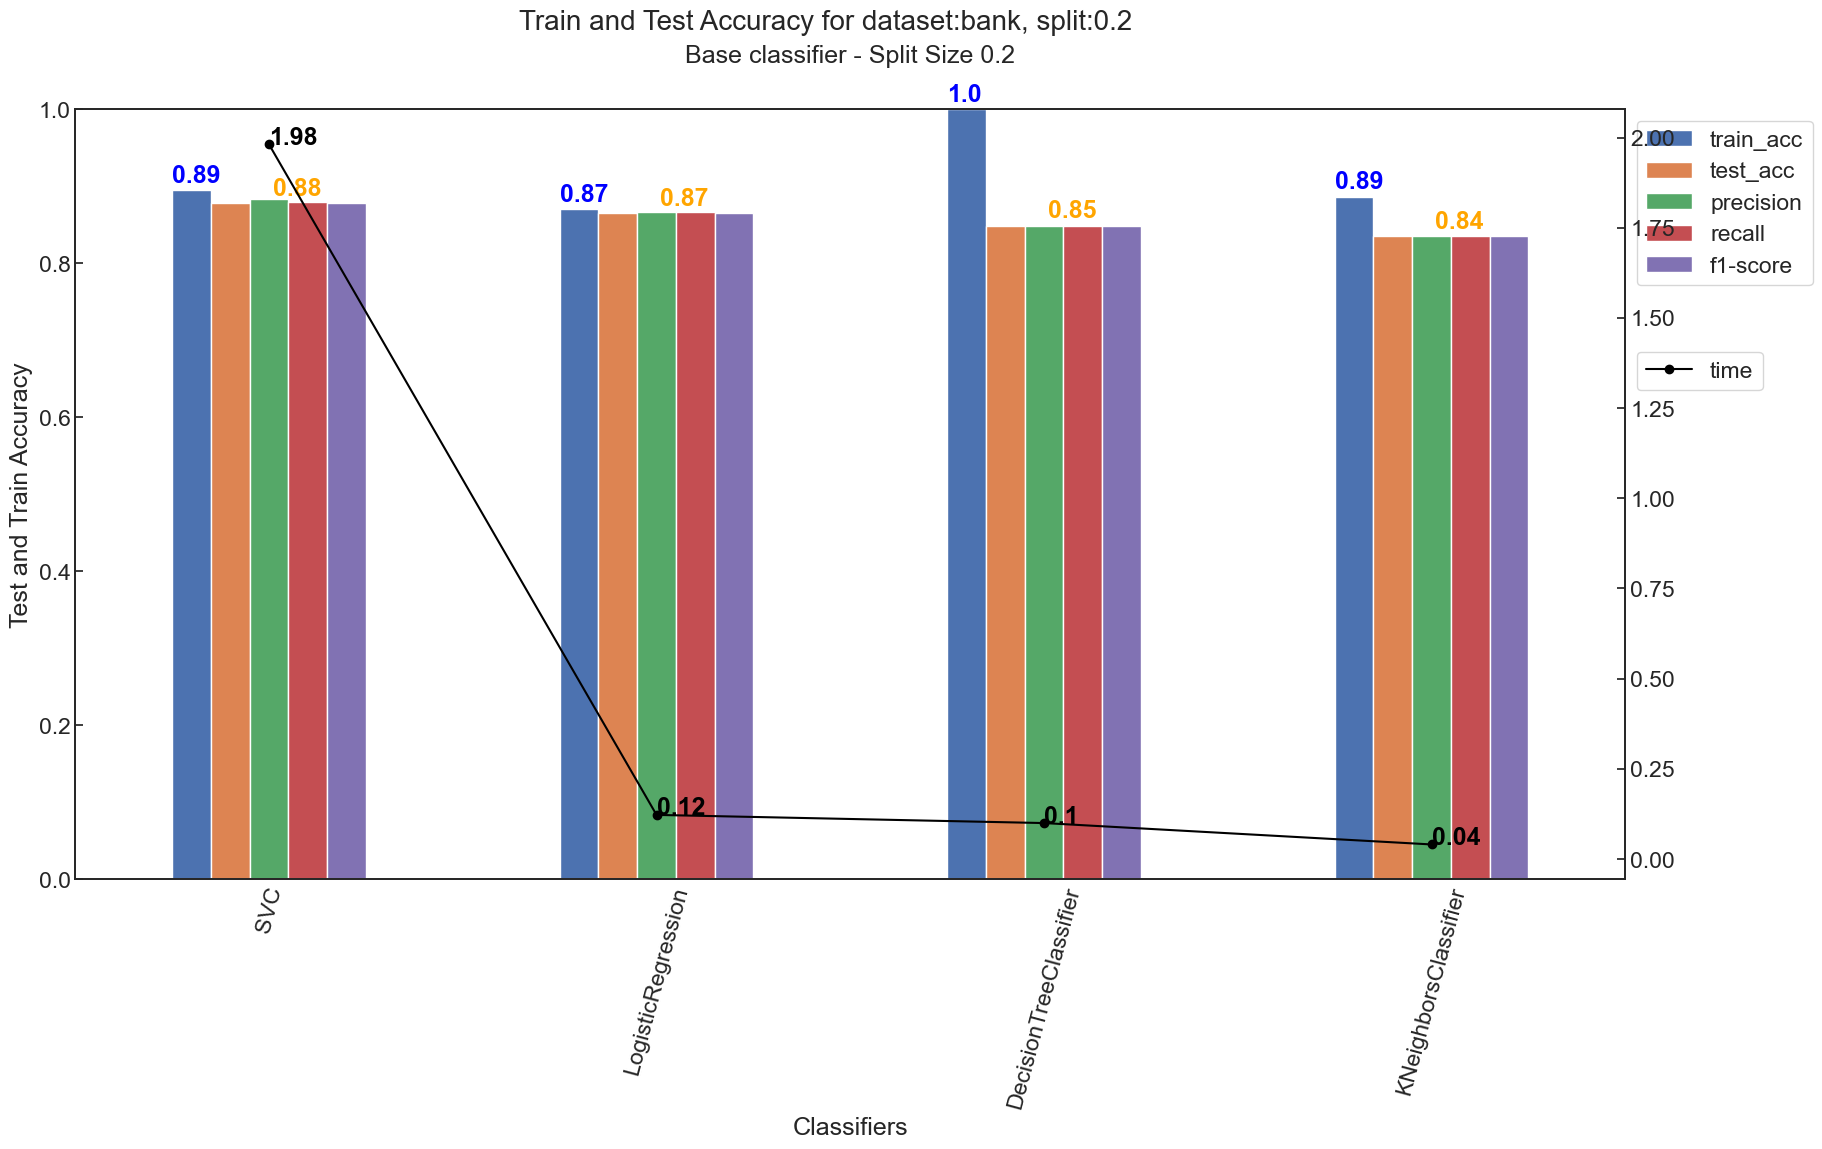

In [42]:
plotAccuracies(out_df, 0.2, 'No', 'bank')

In [43]:
# plot precision, recall, f1-r2_score with sns
# sns.set_style("whitegrid")
# sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5}) . 
# sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

# fig, ax = plt.subplots(1, 2, figsize=(20, 6))
# sns.barplot(x='recall', y='precision', hue='model', data=out_df, ax=ax[0])
# sns.barplot(x='recall', y='f1-score', hue='model', data=out_df, ax=ax[1])
# # set titles
# ax[0].set_title('Precision vs Recall')

# ax[1].set_title('F1 Score vs Recall')
# #show plot
# plt.show()




In [44]:
# print precision grouped by model
print(out_df.groupby('model')['precision'].mean())




model
DecisionTreeClassifier    0.804852
KNeighborsClassifier      0.855959
LogisticRegression        0.864067
SVC                       0.875817
Name: precision, dtype: float64


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [45]:
out_df[['model', 'time', 'train_acc', 'test_acc', 'split', 'grid']].query('split == 0.1 and grid == "No"').sort_values(by='time', ascending=False)



,model,time,train_acc,test_acc,split,grid


In [47]:
out_df

,model,train_acc,test_acc,time,split,grid,data,precision,recall,f1-score,support,timestamp
0,DecisionTreeClassifier,1.000000,0.849138,0.0995,0.2,No,bank,0.849104,0.849104,0.849104,928.0,NaN
1,DecisionTreeClassifier,0.743265,0.742996,29.1063,0.2,Yes,bank,0.760600,0.740978,0.737481,928.0,NaN
2,LogisticRegression,0.870151,0.865841,0.1221,0.2,No,bank,0.866647,0.866208,0.865823,928.0,NaN
3,LogisticRegression,0.867726,0.860991,9.8432,0.2,Yes,bank,0.861486,0.861285,0.860986,928.0,NaN
4,KNeighborsClassifier,0.886853,0.835668,0.0402,0.2,No,bank,0.835687,0.835558,0.835603,928.0,NaN
5,KNeighborsClassifier,0.999865,0.874461,104.9037,0.2,Yes,bank,0.876230,0.874994,0.874400,928.0,NaN
6,SVC,0.894801,0.878772,1.9808,0.2,No,bank,0.883196,0.879598,0.878563,928.0,NaN
7,SVC,0.871363,0.865841,8.5033,0.2,Yes,bank,0.868438,0.866485,0.865723,928.0,NaN


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### To improve, we will do a GridSearchCV.
- For this, use only top 10 parameters from permutation_importance,  for LogisticRegression, KNeighborsClassifier, SVC.
- For DecisionTreeClassifier, use feature importance.

#### below is the plot for same:

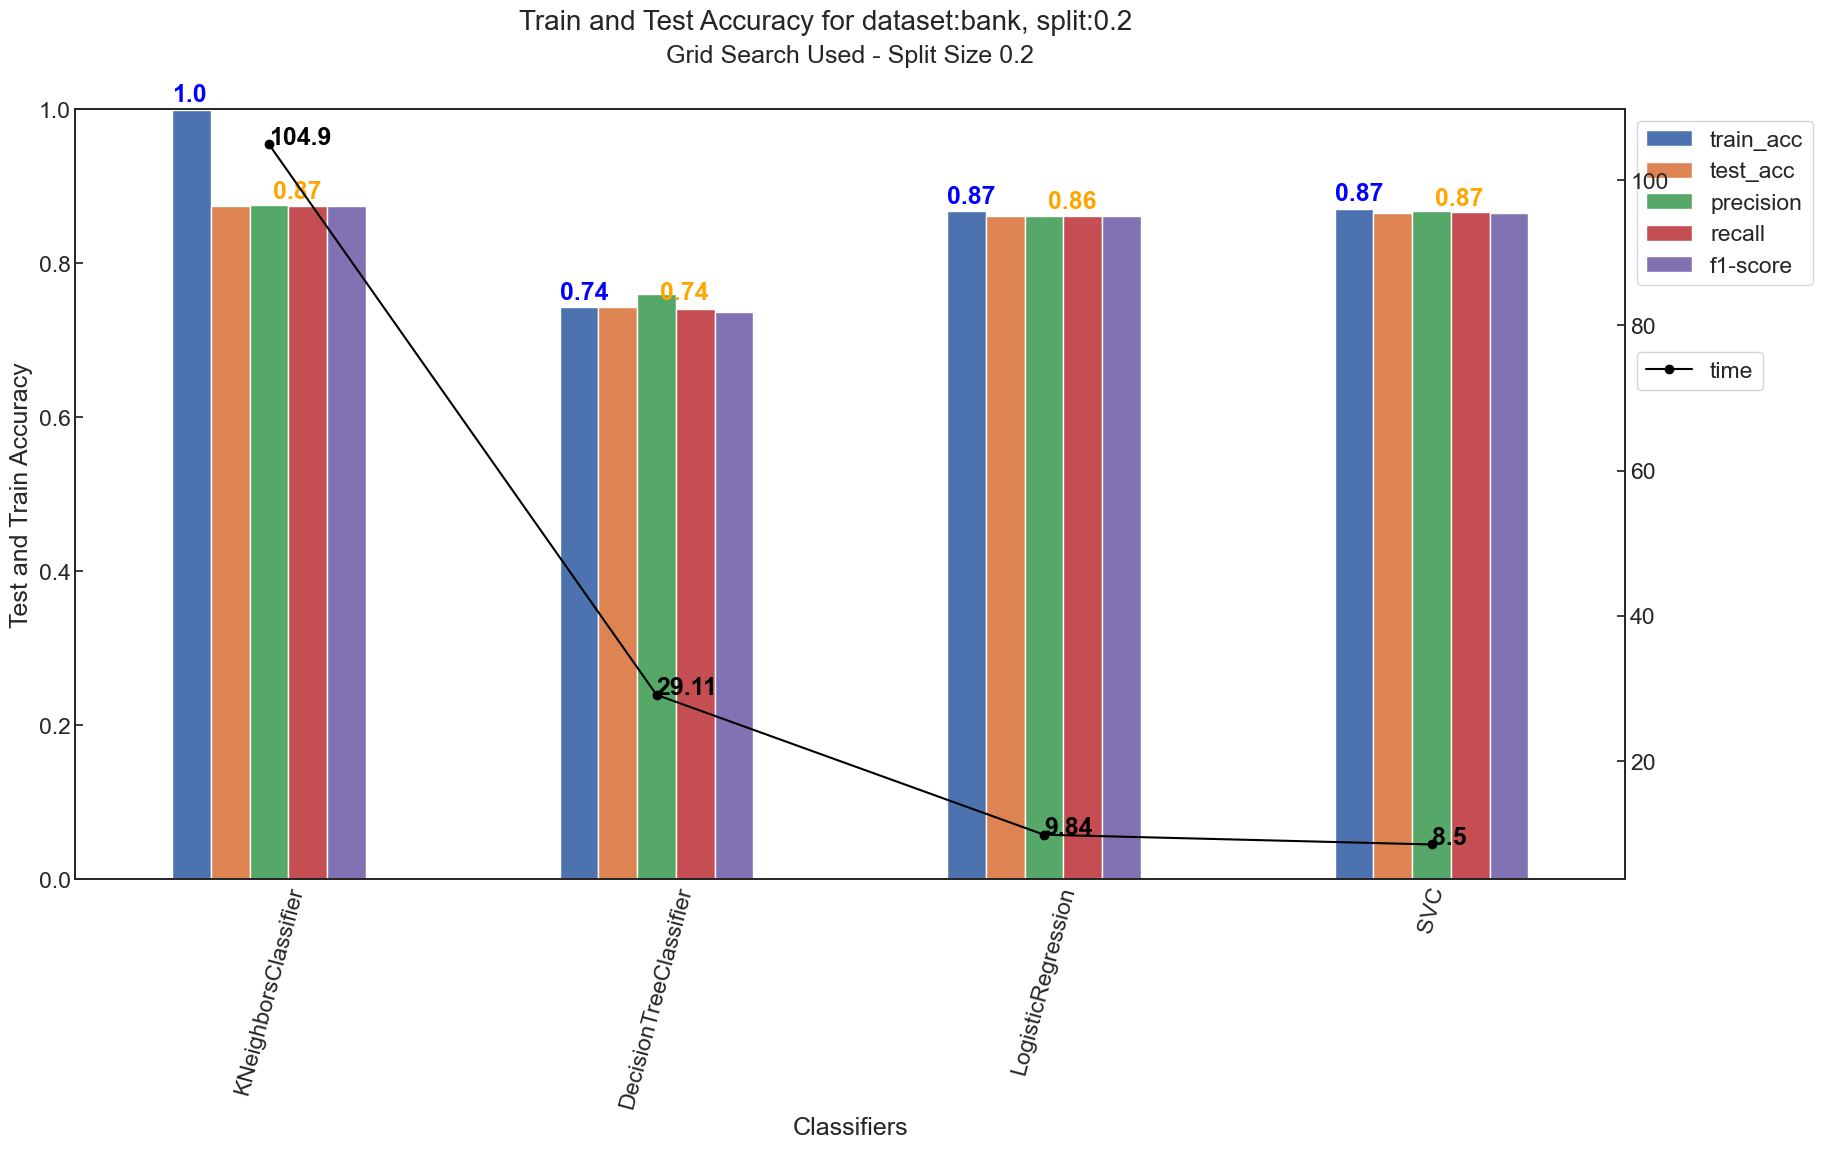

In [48]:
plotAccuracies(out_df, 0.2, 'Yes', 'bank')

#### using GridSearchCV, we can see that best params are used for each classifier

In [59]:
splitsize = 0.2

[Text(0, 0, 'DecisionTreeClassifier'),
 Text(1, 0, 'LogisticRegression'),
 Text(2, 0, 'KNeighborsClassifier'),
 Text(3, 0, 'SVC')]

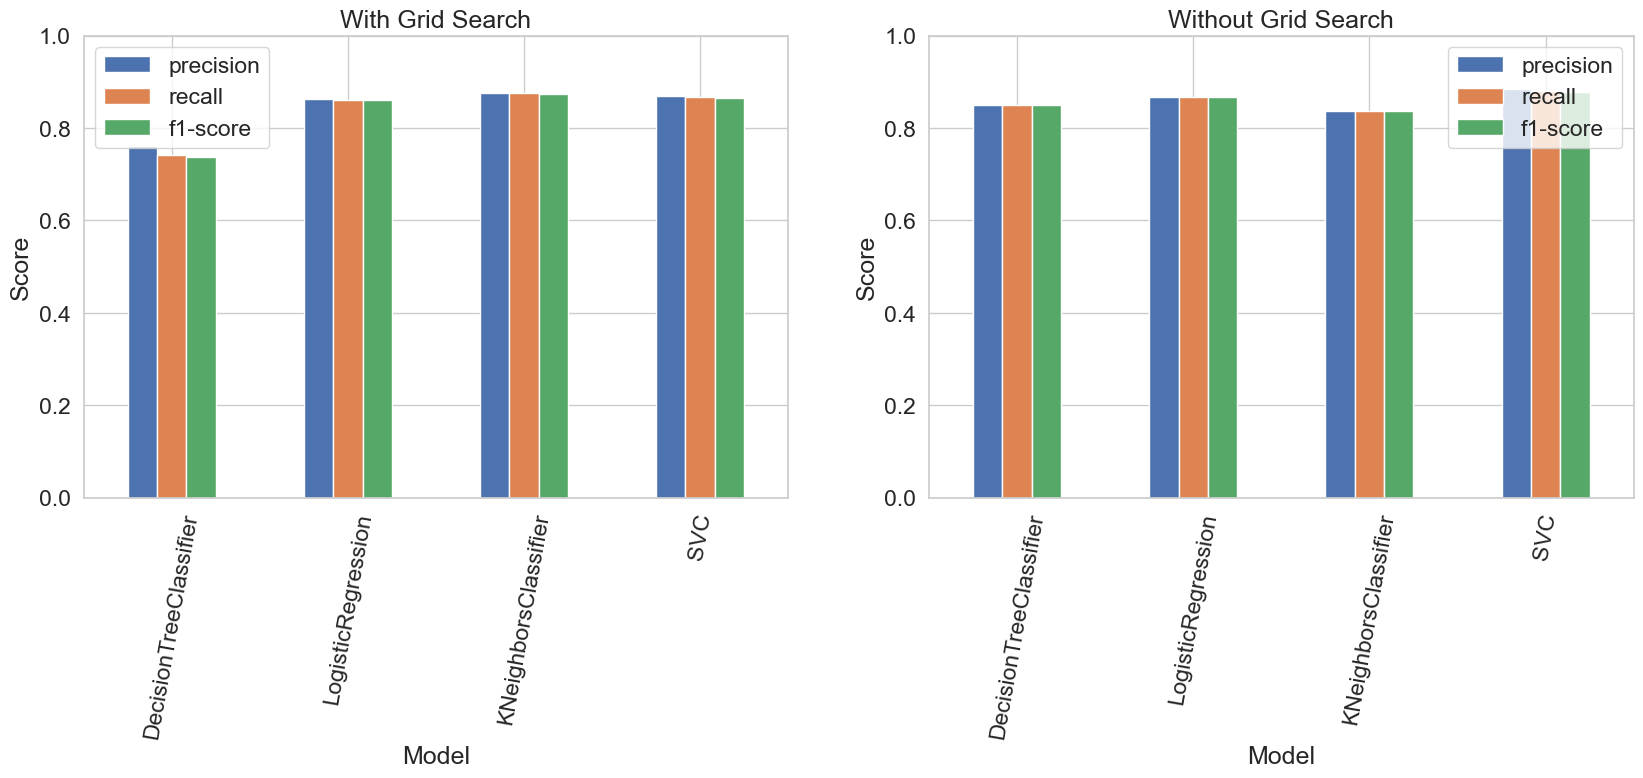

In [52]:
with_grid = out_df[out_df['grid'] == 'Yes'][out_df['split']==splitsize]
without_grid = out_df[out_df['grid'] == 'No'][out_df['split']==splitsize]
# show plot grid lines
sns.set_style("whitegrid")


fig, ax = plt.subplots(1, 2, figsize=(20, 6))
# plot with grid
with_grid.plot.bar(x='model', y=['precision', 'recall', 'f1-score'], ax=ax[0])

# plot without grid
without_grid.plot.bar(x='model', y=['precision', 'recall', 'f1-score'], ax=ax[1])
# set titles
ax[0].set_title('With Grid Search')
ax[1].set_title('Without Grid Search')
# set labels
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Score')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('Score')
# set legend
ax[0].legend(['precision', 'recall', 'f1-score'])
ax[1].legend(['precision', 'recall', 'f1-score'])
# set y limits
ax[0].set_ylim(0, 1)
ax[1].set_ylim(0, 1)
# set x ticks
ax[0].set_xticklabels(with_grid['model'], rotation=80)
ax[1].set_xticklabels(with_grid['model'], rotation=80)





In [61]:
# out_df[['model', 'time', 'train_acc', 'test_acc', 'split', 'grid']].query('split == 0.1 and grid == "Yes"').sort_values(by='time', ascending=False)

with_grid = out_df[out_df['grid'] == 'Yes'][out_df['split']==splitsize].sort_values(by='test_acc', ascending=False)
with_grid[['model', 'time', 'train_acc', 'test_acc', 'precision', 'recall', 'f1-score']]

,model,time,train_acc,test_acc,precision,recall,f1-score
5,KNeighborsClassifier,104.9037,0.999865,0.874461,0.876230,0.874994,0.874400
7,SVC,8.5033,0.871363,0.865841,0.868438,0.866485,0.865723
3,LogisticRegression,9.8432,0.867726,0.860991,0.861486,0.861285,0.860986
1,DecisionTreeClassifier,29.1063,0.743265,0.742996,0.760600,0.740978,0.737481


Results

Model:

- The bank campaign dataset presented an imbalanced target class, the issue was addressed by down sampling the majority class.
- Balancing the target class helped to improve the accuracy since some models performed poorly by falling to classify the minority class.
- During improvement phase, several data quality issues were addressed such as outliers and adding more features to the model.
- Best model from the score standpoint is KNN, however, it is also significantly slower when compared to the other models.

Success factors:
- The month in which the client was contacted, being March the month with higher probability of success.
Metrics related to campaign such as:
- How many times has the client been contacted during previous campaigns.
- How many days since the last time the client was contacted.
The result of the last contact.
- Economics and social factors such as consumer and employment indexes increase confidence and therefore probability of a client subscribing a deposit.


##### Questions